In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [7]:
data = pd.read_csv("./dataset/final_training.csv")  ## path
data.head()

Unnamed: 0                                             Review  Label
0           0  aret as a woman you should not complain a abou...      0
1           1  aret boy dats cold tyga dwn bad for cuffin dat...      1
2           2  aret dawg aret you ever fuck a bitch and she s...      1
3           3                        aret she look like a tranny      1
4           4  aret the shit you hear a about ame amight be t...      1

In [8]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [9]:
data.describe()

Label
count  184354.000000
mean        0.199860
std         0.399896
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

#### 1 for toxic 0 for normal


In [10]:
toxic = data[data["Label"]==1]
normal = data[data["Label"]==0]

In [11]:
len(toxic),len(normal)

(36845, 147509)

In [12]:
print("Percentage of normal comments = {}".format(len(normal)/len(data)*100))
print("Percentage of toxic comments = {}".format(len(toxic)/len(data)*100))

Percentage of normal comments = 80.01399481432462
Percentage of toxic comments = 19.986005185675385


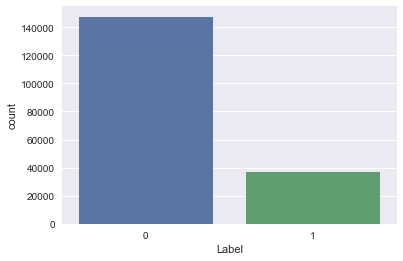

In [13]:
sns.set()
sns.countplot(data["Label"])
plt.show()

In [14]:
data['char_length'] = data['Review'].apply(lambda x: len(str(x)))

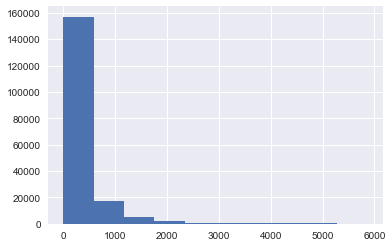

In [15]:
sns.set()
data['char_length'].hist()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Label'], test_size=0.2, random_state=42)

In [17]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(147483,) (36871,)
(147483,) (36871,)


In [18]:
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features = 10000, stop_words='english')
#vect = TfidfVectorizer(stop_words='english')
print(vect)
pickle.dump(vect, open("./saved_models/vectorizer.pkl", "wb"))

TfidfVectorizer(max_features=10000, stop_words='english')


In [19]:
import pickle
vect = pickle.load(open("./saved_models/vectorizer.pkl", 'rb'))

In [22]:
%%time 

X_train_dtm = vect.fit_transform(X_train)

X_train_dtm

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [21]:
pickle.dump(vect, open("vectorizer.pickle", "wb"))